![banner-pdi](https://user-images.githubusercontent.com/58775072/141189378-b5df3287-e8c0-48a1-ad11-825ba317463b.png)

## Universidade Federal de Campina Grande (UFCG)
## Centro de Engenharia Elétrica e Informática (CEEI) 
## Disciplina: Int. ao Processamento de Imagem Digital e Visão Computacional
## Professora: Luciana Ribeiro Veloso
## Aluno(a): Coloque seu nome aqui

# <span style="color:brown">Experimento 03: Domínio da Frequência e Filtragem</span>
***

## Sumário de Conteúdos

* [0. Importação dos Pacotes](#0)
* [1. Imagens no Domínio da Frequência](#1)
* [2. Filtragem em Frequência](#2)
* [3. Tempo de Processamento](#3)

## <span style='color:red'>Observações</span>
***
1. Os arquivos de laboratório devem ser salvos seguindo o seguinte padrão: `lab-x-nome-sobrenome.ipynb`.
2. Não esqueça de colocar o seu nome no cabeçalho acima.
3. Não altere a ordem das células e realize as implementações somente nos campos específicados.  
4. Ao longo do laboratório será solicitado perguntas teóricas relativas aos assuntos das aulas da disciplina e implementações de código utilizando a linguagem de programação Python. 
5. <span style='color:blue'>As células com as perguntas estão representadas pela cor azul</span>. <span style='color:green'>As células de resposta teórica estão representadas pela cor verde</span>.
6. As células de implementação com código serão indicadas pelos seguintes comentários: `# IMPLEMENTE O SEU CÓDIGO AQUI`.
7. Para editar uma célula de texto, basta clicar duas vezes com o cursos do mouse para editar, e `Ctrl + Enter` para finalizar a edição. 
8. Para rodar as células com os códigos desenvolvidos, digite `Ctrl + Enter` ou clique em `Run` no menu do Jupyter.
9. Dúvidas, problemas de execução de código ou dificuldades com a linguagem de programação Python devem ser feitas durante as aulas de laboratório, encaminhadas para o grupo de WhatsApp da turma ou fórum do PVAE da disciplina.
10. Os laboratórios devem ser enviados nos campos especificados pelo PVAE. <span style='color:red'>ATENTE-SE AOS PRAZOS DE ENTREGA!</span>

## Importação dos Pacotes

In [4]:
import os                            # Operational System para manipulação de arquivos.
import cv2                           # OpenCV para manipulação de imagens.
import numpy as np                   # Numpy para manipulação de matrizes e arrays.
import matplotlib.pyplot as plt      # Pyplot para plotagem de gráficos e imagens.
from scipy.signal import convolve2d  # Scipy para realização de convoluções 2D.

## Imagens no Domínio da Frequência

Uma imagem pode ser convertida do domínio espacial para o domínio da frequência através de várias transformadas, sendo uma delas a transformada de Fourier bidimensional. A FFT bidimensional está disponível no pacote Numpy, sendo geralmente utilizada em conjunto de uma função para deslocar o componente de frequência zero para o centro do arranjo bidimensional resultante. Naturalmente, a transformada inversa, IFFT, também está disponível.

* A FFT pode ser computada a partir de uma imagem por: **src_img_fft = np.fft.fft2( src_img )**
* A versão transladada da FFT pode ser obtida por: **shifted_fft = np.fft.fftshift( src_img_fft )**
* A IFFT pode ser obtida a partir de uma FFT com: **src_img = np.fft.ifft2( src_img_fft )**

 ## <span style='color:blue'>Questão 1: [Valor da Questão: 2.5][Taxa de acerto: x.x]</span>

* (a) <span style="color:blue"> **O código abaixo utiliza as funções acima para misturar duas imagens:**</span>
    * <span style="color:blue">Repita o processo para diferentes pares de imagens e comente como essa mistura é realizada.</span> 
    * <span style="color:blue">Qual componente das misturas retém mais informações referentes à imagem original? Justifique.</span>

* (b) <span style="color:blue"> **A partir da imagem "tiger.jpg":**</span>
    * <span style="color:blue">Calcule sua FFT e analise os valores do seu espectro.</span>
    * <span style="color:blue">Plote o Espectro e a Fase da FFT da imagem. Comente suas observações.</span>
    * <span style="color:blue">Utilize a função fftshift para mover a origem da transformada para a região central e visualize novamente o espectro da FFT.</span>
    * <span style="color:blue">Aplique o logaritmo ao espectro para melhorar a visualização da imagem.</span>
    * <span style="color:blue">Calcule a IFFT da transformada após aplicar a translação. É possível reconhecer a imagem?</span>

In [5]:
#  IMPLEMENTE SEU CÓDIGO AQUI -> QUESTÃO 1 - LETRA (a)


## <span style='color:green'>Respostas da Questão 1:</span>

* (a) <span style='color:green'>Adicione sua resposta aqui.</span>

In [6]:
#  IMPLEMENTE SEU CÓDIGO AQUI -> QUESTÃO 1 - LETRA (b)


## <span style='color:green'>Respostas da Questão 1:</span>

* (b) <span style='color:green'>Adicione sua resposta aqui.</span>

## Filtragem em Frequência

Conforme visto nas aulas de PDI, imagens também podem ser filtradas no domínio da frequência utilizando FFT, uma abordagem mais condizente com o termo "filtragem". Para realizar a filtragem, é necessário realizar os seguintes passos:

1. Obter os parâmetros de preenchimento Mp e Np. 
2. Realizar o preenchimento da imagem de entrada.
3. Calcular a FFT da imagem de entrada.
4. Aplicar a translação para centralizar a transformada da imagem.
5. Realizar o preenchimento do filtro utilizado.
6. Calcular a FFT do filtro utilizado.
7. Aplicar a translação para centralizar a transformada do filtro.
8. Obter a FFT da imagem filtrada a partir do produto entre as FFTs da imagem e do filtro.
9. Desfazer a translação e realizar a transformada inversa.

Esse procedimento é realizado nas duas células a seguir, em que a primeira célula define algumas funções auxiliares e a segunda realiza a filtragem em frequência e a filtragem no espaço para que se possa comparar os resultados.

In [7]:
# Essa célula contém funções auxiliares para a realização da filtragem em frequência.
def get_2d_gaussian_kernel(size, sigma, dtype=cv2.CV_32F):
    """ Essa função retorna um filtro gaussiano 2D com base no tamanho e sigma especificados."""
    
    # Produz filtros 1D nas direções x e y
    kernel_y = cv2.getGaussianKernel(size, sigma, ktype = dtype)
    kernel_x = cv2.getGaussianKernel(size, sigma, ktype = dtype).T
    
    # Retorna o produto matricial dos filtros para produzir um filtro 2D
    return np.dot( kernel_y, kernel_x )

def paddedsize(src_img, kernel):
    """ Essa função determina o menor tamanho apropriado para a realização da 
    filtragem em frequência a partir de uma imagem (scr_img) e um filtro (kernel)."""
    
    # Extrai as dimensões da imagem e do filtro
    H_i, W_i = src_img.shape
    H_k, W_k = kernel.shape
    
    # Encontra o menor tamanho que satisfaz as condições de filtragem
    H = H_i + H_k -1
    W = W_i + W_k -1
    
    # Ajusta H e W para que sejam pares
    H = (H+1) if H % 2 != 0 else H
    W = (W+1) if W % 2 != 0 else W
    return H, W

def apply_padding(img, shape, dtype):
    """ Essa função aplica zero-padding em uma imagem com base no shape fornecido."""
    padded = np.zeros(shape, dtype)
    padded[:img.shape[0], :img.shape[1]] = img
    return padded

 ## <span style='color:blue'>Questão 2: [Valor da Questão: 2.5][Taxa de acerto: x.x]</span>

 <span style="color:blue"> **O código abaixo realiza a filtragem a partir de um filtro passa-baixas Gaussiano:**</span>
*   (a)  <span style="color:blue">Que elementos na FFT do filtro permitem identificar que se trata de um filtro passa-baixas?</span>
*   (b)  <span style="color:blue">Ajuste o tamanho do filtro a partir da variável ksize e comente o que acontece com o módulo da sua FFT.</span>

Text(0.5, 0, 'Shape: (518, 518)')

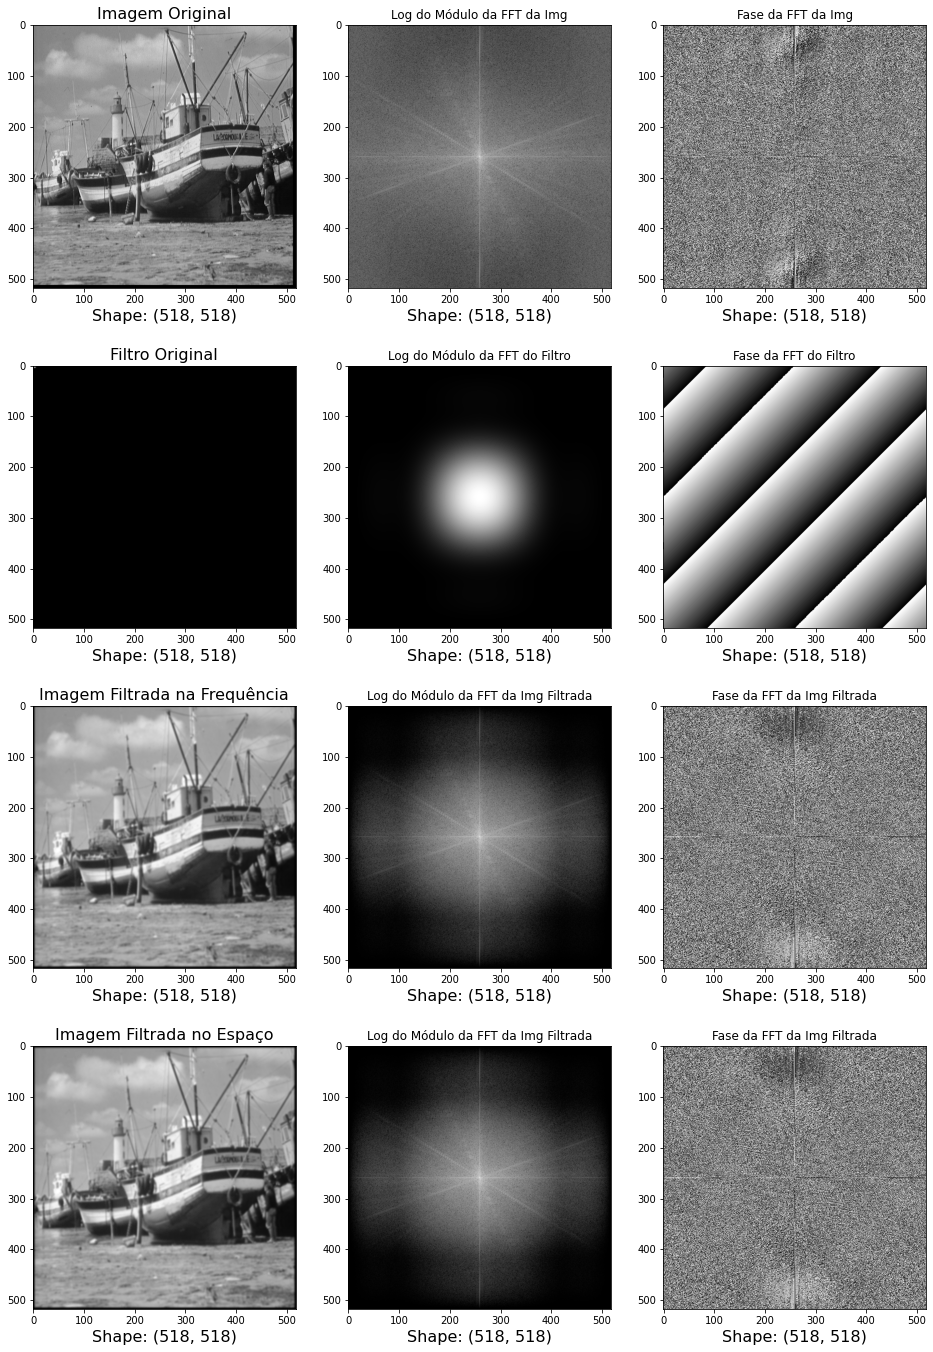

In [12]:
# Primeira coluna de figuras ---------------------------------------------

# Imagem a ser filtrada
src_img  = cv2.imread('imagens/boat.512.tiff', 0 )

# Filtro utilizado
sigma  = 0
ksize  = 7
kernel = get_2d_gaussian_kernel( ksize, sigma )

# Filtragem na Frequência ------------------------------------------------

# Encontra o tamanho minimo das imagens
H, W = paddedsize(src_img, kernel)

# Aplica padding na imagem e no filtro
pad_img = apply_padding(src_img, (H, W), np.float64)
pad_knl = apply_padding(kernel,  (H, W), np.float64)

# Aplica a transformada
img_fft = np.fft.fft2( pad_img )
knl_fft = np.fft.fft2( pad_knl )

# Aplica translação para centralizar a imagem
img_shift = np.fft.fftshift( img_fft )
knl_shift = np.fft.fftshift( knl_fft )

# Multiplica para realizar a filtragem
dst_shift = img_shift * knl_shift

# Desfaz a translação e obtém a imagem correspondente no domínio do tempo a partir da IFFT
dst_fft = np.fft.ifftshift( dst_shift )
frq_dst_img = np.fft.ifft2( dst_fft ).real

# Filtragem na Frequência ------------------------------------------------

# Filtragem no espaço
spa_dst_img  = convolve2d( src_img, kernel, mode="full", boundary="fill", fillvalue=0).astype(np.float64)

# FFT para obter a resposta em frequência da convolução no espaço
pad_spa_dst_img   = apply_padding(spa_dst_img, (H, W), np.float64)
spa_dst_img_fft   = np.fft.fft2( pad_spa_dst_img )
spa_dst_img_shift = np.fft.fftshift( spa_dst_img_fft )

##############################################################################################################################
# Plotagem das figuras     ---------------------------------------------------------------------------------------------------
##############################################################################################################################

fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize=(16, 24))

# Primeira linha de figuras ---------------------------------------------

# Primeira Subfigura
axs[0][0].imshow(pad_img, cmap="gray")
axs[0][0].set_title("Imagem Original", fontsize = 16)
axs[0][0].set_xlabel("Shape: {}".format(pad_img.shape), fontsize = 16)

# Segunda Subfigura da Primeira linha
axs[0][1].imshow( np.log(np.abs(img_shift)+1) , cmap="gray" )
axs[0][1].set_title("Log do Módulo da FFT da Img")
axs[0][1].set_xlabel("Shape: {}".format(img_shift.shape), fontsize = 16)

# Terceira Subfigura da Primeira linha
axs[0][2].imshow(np.angle(img_shift), cmap="gray")
axs[0][2].set_title("Fase da FFT da Img")
axs[0][2].set_xlabel("Shape: {}".format(img_shift.shape), fontsize = 16)

# Segunda linha de figuras ---------------------------------------------

# Primeira Subfigura
axs[1][0].imshow(pad_knl, cmap="gray")
axs[1][0].set_title("Filtro Original", fontsize = 16)
axs[1][0].set_xlabel("Shape: {}".format(pad_knl.shape), fontsize = 16)

# Segunda Subfigura da Primeira linha
axs[1][1].imshow( np.log(np.abs(knl_shift)+1) , cmap="gray" )
axs[1][1].set_title("Log do Módulo da FFT do Filtro")
axs[1][1].set_xlabel("Shape: {}".format(knl_shift.shape), fontsize = 16)

# Terceira Subfigura da Primeira linha
axs[1][2].imshow(np.angle(knl_shift), cmap="gray")
axs[1][2].set_title("Fase da FFT do Filtro")
axs[1][2].set_xlabel("Shape: {}".format(knl_shift.shape), fontsize = 16)

# Terceira linha de figuras ---------------------------------------------

# Primeira Subfigura
axs[2][0].imshow(frq_dst_img, cmap="gray")
axs[2][0].set_title("Imagem Filtrada na Frequência", fontsize = 16)
axs[2][0].set_xlabel("Shape: {}".format(frq_dst_img.shape), fontsize = 16)

# Segunda Subfigura da Primeira linha
axs[2][1].imshow( np.log(np.abs(dst_shift)+1) , cmap="gray" )
axs[2][1].set_title("Log do Módulo da FFT da Img Filtrada")
axs[2][1].set_xlabel("Shape: {}".format(dst_shift.shape), fontsize = 16)

# Terceira Subfigura da Primeira linha
axs[2][2].imshow(np.angle(dst_shift), cmap="gray")
axs[2][2].set_title("Fase da FFT da Img Filtrada")
axs[2][2].set_xlabel("Shape: {}".format(dst_shift.shape), fontsize = 16)

# Quarta linha de figuras ---------------------------------------------

# Primeira Subfigura
axs[3][0].imshow(spa_dst_img, cmap="gray")
axs[3][0].set_title("Imagem Filtrada no Espaço", fontsize = 16)
axs[3][0].set_xlabel("Shape: {}".format(spa_dst_img.shape), fontsize = 16)

# Segunda Subfigura da Primeira linha
axs[3][1].imshow( np.log(np.abs(spa_dst_img_shift)+1) , cmap="gray" )
axs[3][1].set_title("Log do Módulo da FFT da Img Filtrada")
axs[3][1].set_xlabel("Shape: {}".format(spa_dst_img_shift.shape), fontsize = 16)

# Terceira Subfigura da Primeira linha
axs[3][2].imshow(np.angle(spa_dst_img_shift), cmap="gray")
axs[3][2].set_title("Fase da FFT da Img Filtrada")
axs[3][2].set_xlabel("Shape: {}".format(spa_dst_img_shift.shape), fontsize = 16)

## <span style='color:green'>Respostas da Questão 2:</span>
* (a) <span style='color:green'>Adicione sua resposta aqui.</span>
* (b) <span style='color:green'>Adicione sua resposta aqui.</span>

* **Observe que a filtragem em frequência foi equivalente a uma filtragem espacial utilizando convoluções do tipo "full", o que resulta em uma borda escura em torno da imagem de saída e de uma imagem de saída pouco maior que a imagem de entrada.**
* **Se quiséssemos uma convolução do tipo "same" ou "valid", bastaria recortar a imagem de saída para eliminar elementos da borda e obteríamos imagens idênticas.**

* (c) <span style="color:blue"> **O código abaixo ilustra a magnitude da FFT de diversos filtros. Classifique-os em filtros passa-baixas e filtros passa-altas. Justifique.**</span>

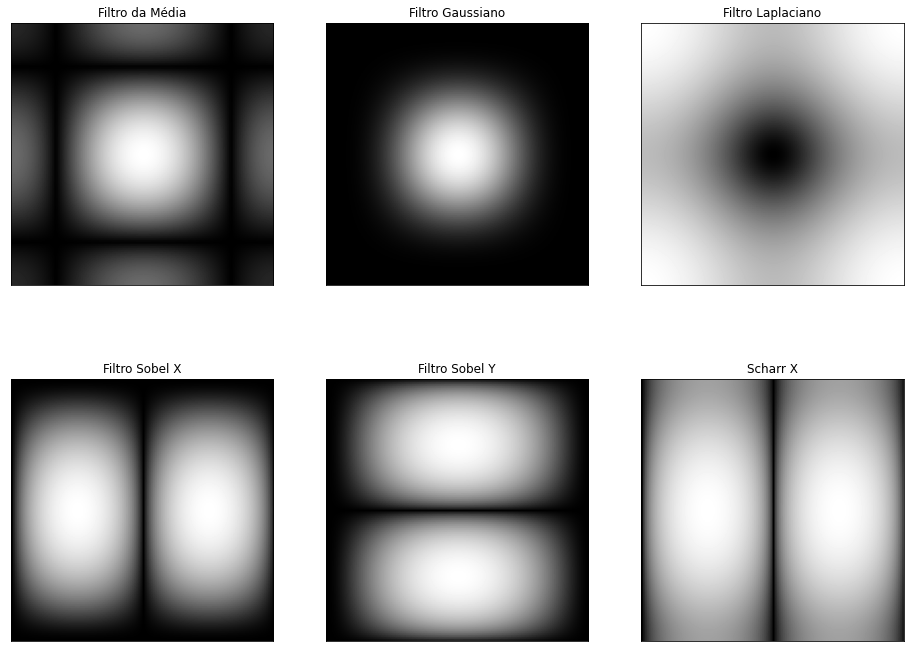

In [16]:
# Filtro da média
mean_filter  = np.ones((3,3)) / 9

# Filtro gaussiano
gauss_filter = get_2d_gaussian_kernel( 5, 0 )

# Filtros de detecção de borda
# scharr in x-direction
scharr_filter = np.array([[-3, 0, 3],
                          [-10,0,10],
                          [-3, 0, 3]])

# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])

# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

# Lista os filtros
filters      = [mean_filter, gauss_filter, laplacian, sobel_x, sobel_y, scharr_filter]

# Lista os nomes dos filtros
filter_name  = ["Filtro da Média", "Filtro Gaussiano","Filtro Laplaciano", "Filtro Sobel X", "Filtro Sobel Y", "Scharr X"]

# Computa a FFT dos filtros da lista
fft_filters  = [np.fft.fft2(x, (128,128)) for x in filters]

# Aplica fftshift na FFT de cada filtro
fft_shift    = [np.fft.fftshift(y) for y in fft_filters]

# Obtém a magnitude da FFT de cada filtro
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(16, 12))

# Plota todos os filtros
for i, ax in enumerate(axs.flat):
    plt.sca(ax)
    plt.imshow(mag_spectrum[i], cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

## <span style='color:green'>Respostas da Questão 2:</span>

* (c) <span style='color:green'>Adicione sua resposta aqui.</span>

 ## <span style='color:blue'>Questão 3: [Valor da Questão: 2.5][Taxa de acerto: x.x]</span>

*  <span style='color:blue'>**Substitua no código abaixo kernel pelos filtros acima. E teste os resultados.**</span> 

Text(0.5, 0, 'Shape: (514, 514)')

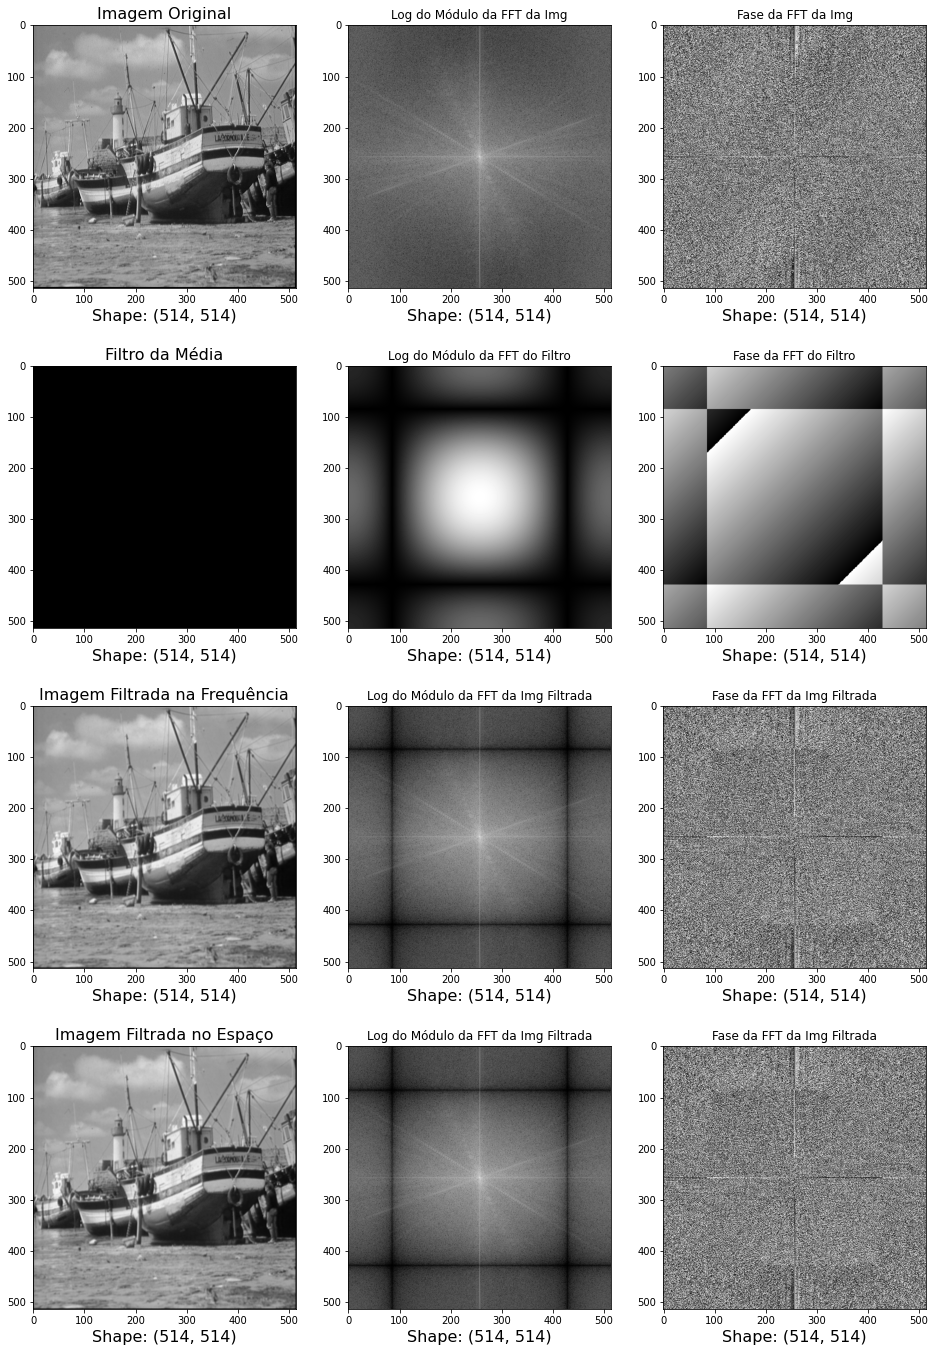

In [18]:
# Primeira coluna de figuras ---------------------------------------------

# Imagem a ser filtrada
src_img  = cv2.imread("imagens/boat.512.tiff", 0 )
 
# Filtro utilizado

kernel = mean_filter

# Filtragem na Frequência ------------------------------------------------

# Encontra o tamanho minimo das imagens
H, W = paddedsize(src_img, kernel)

# Aplica padding na imagem e no filtro
pad_img = apply_padding(src_img, (H, W), np.float64)
pad_knl = apply_padding(kernel,  (H, W), np.float64)

# Aplica a transformada
img_fft = np.fft.fft2( pad_img )
knl_fft = np.fft.fft2( pad_knl )

# Aplica translação para centralizar a imagem
img_shift = np.fft.fftshift( img_fft )
knl_shift = np.fft.fftshift( knl_fft )

# Multiplica para realizar a filtragem
dst_shift = img_shift * knl_shift

# Desfaz a translação e obtém a imagem correspondente no domínio do tempo a partir da IFFT
dst_fft = np.fft.ifftshift( dst_shift )
frq_dst_img = np.fft.ifft2( dst_fft ).real

# Filtragem na Frequência ------------------------------------------------

# Filtragem no espaço
spa_dst_img  = convolve2d( src_img, kernel, mode="full", boundary="fill", fillvalue=0).astype(np.float64)

# FFT para obter a resposta em frequência da convolução no espaço
pad_spa_dst_img   = apply_padding(spa_dst_img, (H, W), np.float64)
spa_dst_img_fft   = np.fft.fft2( pad_spa_dst_img )
spa_dst_img_shift = np.fft.fftshift( spa_dst_img_fft )

##############################################################################################################################
# Plotagem das figuras     ---------------------------------------------------------------------------------------------------
##############################################################################################################################

fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize=(16, 24))

# Primeira linha de figuras ---------------------------------------------

# Primeira Subfigura
axs[0][0].imshow(pad_img, cmap="gray")
axs[0][0].set_title("Imagem Original", fontsize = 16)
axs[0][0].set_xlabel("Shape: {}".format(pad_img.shape), fontsize = 16)

# Segunda Subfigura da Primeira linha
axs[0][1].imshow( np.log(np.abs(img_shift)+1) , cmap="gray" )
axs[0][1].set_title("Log do Módulo da FFT da Img")
axs[0][1].set_xlabel("Shape: {}".format(img_shift.shape), fontsize = 16)

# Terceira Subfigura da Primeira linha
axs[0][2].imshow(np.angle(img_shift), cmap="gray")
axs[0][2].set_title("Fase da FFT da Img")
axs[0][2].set_xlabel("Shape: {}".format(img_shift.shape), fontsize = 16)

# Segunda linha de figuras ---------------------------------------------

# Primeira Subfigura
axs[1][0].imshow(pad_knl, vmin=0, vmax=1, cmap="gray")
axs[1][0].set_title("Filtro da Média", fontsize = 16)
axs[1][0].set_xlabel("Shape: {}".format(pad_knl.shape), fontsize = 16)

# Segunda Subfigura da Primeira linha
axs[1][1].imshow( np.log(np.abs(knl_shift)+1) , cmap="gray" )
axs[1][1].set_title("Log do Módulo da FFT do Filtro")
axs[1][1].set_xlabel("Shape: {}".format(knl_shift.shape), fontsize = 16)

# Terceira Subfigura da Primeira linha
axs[1][2].imshow(np.angle(knl_shift), cmap="gray")
axs[1][2].set_title("Fase da FFT do Filtro")
axs[1][2].set_xlabel("Shape: {}".format(knl_shift.shape), fontsize = 16)

# Terceira linha de figuras ---------------------------------------------

# Primeira Subfigura
axs[2][0].imshow(frq_dst_img, cmap="gray")
axs[2][0].set_title("Imagem Filtrada na Frequência", fontsize = 16)
axs[2][0].set_xlabel("Shape: {}".format(frq_dst_img.shape), fontsize = 16)

# Segunda Subfigura da Primeira linha
axs[2][1].imshow( np.log(np.abs(dst_shift)+1) , cmap="gray" )
axs[2][1].set_title("Log do Módulo da FFT da Img Filtrada")
axs[2][1].set_xlabel("Shape: {}".format(dst_shift.shape), fontsize = 16)

# Terceira Subfigura da Primeira linha
axs[2][2].imshow(np.angle(dst_shift), cmap="gray")
axs[2][2].set_title("Fase da FFT da Img Filtrada")
axs[2][2].set_xlabel("Shape: {}".format(dst_shift.shape), fontsize = 16)

# Quarta linha de figuras ---------------------------------------------

# Primeira Subfigura
axs[3][0].imshow(spa_dst_img, cmap="gray")
axs[3][0].set_title("Imagem Filtrada no Espaço", fontsize = 16)
axs[3][0].set_xlabel("Shape: {}".format(spa_dst_img.shape), fontsize = 16)

# Segunda Subfigura da Primeira linha
axs[3][1].imshow( np.log(np.abs(spa_dst_img_shift)+1) , cmap="gray" )
axs[3][1].set_title("Log do Módulo da FFT da Img Filtrada")
axs[3][1].set_xlabel("Shape: {}".format(spa_dst_img_shift.shape), fontsize = 16)

# Terceira Subfigura da Primeira linha
axs[3][2].imshow(np.angle(spa_dst_img_shift), cmap="gray")
axs[3][2].set_title("Fase da FFT da Img Filtrada")
axs[3][2].set_xlabel("Shape: {}".format(spa_dst_img_shift.shape), fontsize = 16)

## Tempo de processamento

Observe que o tamanho dos filtros é uma variável de baixo impacto no número de operações realizado na filtragem em frequência, o que não pode ser dito para a filtragem no espaço. Para medir o impacto desse fenômeno sobre o tempo de execução dos algoritmos, as células abaixo utilizam a mágica **%%timeit**, que computa o tempo médio de execução de uma célula.

In [8]:
def freq_filt(src_img, kernel):
    """ Essa função realiza a filtragem em frequência a partir de uma imagem (src_img) e um filtro (kernel)."""
    
    # Encontra o tamanho minimo das imagens
    H, W = paddedsize(src_img, kernel)
    
    # Aplica padding na imagem e no filtro
    pad_img = apply_padding(src_img, (H, W), np.float64)
    pad_knl = apply_padding(kernel, (H, W), np.float64)
    
    # Aplica a transformada
    img_fft = np.fft.fft2( pad_img )
    knl_fft = np.fft.fft2( pad_knl )
    
    # Aplica translação para centralizar a imagem
    img_shift = np.fft.fftshift( img_fft )
    knl_shift = np.fft.fftshift( knl_fft )
    
    # Multiplica para realizar a filtragem
    dst_shift = img_shift * knl_shift
    
    # Desfaz a translação
    dst_fft = np.fft.ifftshift( dst_shift )
    dst_img = np.fft.ifft2( dst_fft ).real
    return dst_img

 ## <span style='color:blue'>Questão 4: [Valor da Questão: 2.5][Taxa de acerto: x.x]</span>
* <span style="color:blue"> **Execute as células abaixo utilizando filtros de lado (ksize) 3, 7, 11 e 25 e comente os resultados observados.**</span>

In [24]:
ksize = 3
sigma = 0
kernel = get_2d_gaussian_kernel( ksize, sigma )
lenna = cv2.imread("imagens/lenna.tif", 0 )
print("lenna.shape:", lenna.shape)

lenna.shape: (256, 256)


In [25]:
%%timeit
output = convolve2d( lenna, kernel, mode="full", boundary="fill", fillvalue=0 ).astype(np.float64)

2.2 ms ± 97.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%%timeit
output = freq_filt( lenna, kernel )

13.1 ms ± 240 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## <span style='color:green'>Respostas da Questão 4:</span>
* <span style='color:green'>Adicione sua resposta aqui.</span>

***
![cat](https://user-images.githubusercontent.com/58775072/135619414-a3044859-b099-46dc-aa61-fe32c72ee8fe.gif)